# Analysis of Diabetic Retinopathy MCAR Experiment

In [64]:
import os

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

In [73]:
# LOAD DATA

dist_df = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MCAR_Experiment_2022-08-16 15:15:03.445669/MCAR/results/distances_0.csv')
dist_df.drop(columns='Unnamed: 0', inplace=True)

err_df = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MCAR_Experiment_2022-08-16 15:15:03.445669/MCAR/results/errors_0.csv')
err_df.drop(columns='Unnamed: 0', inplace=True)

weights_df = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MCAR_Experiment_2022-08-16 15:15:03.445669/MCAR/results/weights_top_None_0.csv')
weights_df.drop(columns='Unnamed: 0', inplace=True)

preds_df = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MCAR_Experiment_2022-08-16 15:15:03.445669/MCAR/results/predictions_0.csv')
preds_df.drop(
    columns=[
        'Unnamed: 0', 'Uniform Model Averaging',
        "<class 'sklearn.ensemble._stacking.StackingClassifier'>", 'dew_top_1',
        'dew_top_3', 'dew_top_None'
    ], inplace=True
)

dew_err = err_df['dew_top_None']
uniform_err = err_df['Uniform Model Averaging']

In [2]:
import pandas as pd
results = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MCAR_Experiment_2022-08-16 15:15:03.445669/MCAR/final_results.csv')
results

,Unnamed: 0,Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(XGBClassifier)_Imputer(KNNImputer),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(RandomForestClassifier)_Imputer(KNNImputer),Uniform Model Averaging,<class 'sklearn.ensemble._stacking.StackingClassifier'>,dew_top_1,dew_top_3,dew_top_None
0,roc_auc,0.699620,0.711820,0.70668,0.689180,0.708200,0.702140,0.708000,0.706160,0.731840,0.65800,0.692060,0.722440,0.73272
1,accuracy,0.646340,0.648960,0.65156,0.638480,0.648880,0.638540,0.647180,0.646320,0.665440,0.60108,0.632420,0.654140,0.66370
2,weighted_f1_score,0.646038,0.648358,0.65108,0.638035,0.647498,0.637378,0.646263,0.645903,0.664954,0.60018,0.631548,0.653675,0.66321


In [74]:
# CREATE PER-ROW SUMMARY DATAFRAMES

dist_summary_df = dist_df.T.describe().T
err_summary_df = err_df.T.describe().T
weights_summary_df = weights_df.T.describe().T
preds_summary_df = preds_df.T.describe().T

In [84]:
where_dew_outperforms_uniform = np.where(dew_err < uniform_err, 1, 0)
dew_soft_outperforming_uniform = uniform_err - dew_err

pct_dew_better = np.sum(where_dew_outperforms_uniform) / len(where_dew_outperforms_uniform)
print('DEW outperforms uniform model averaging in ' + str(round(pct_dew_better * 100, 2)) + '% of cases.')

DEW outperforms uniform model averaging in 57.17% of cases.


/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


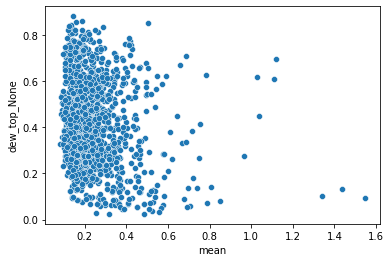

In [76]:
# Correlation analysis

sns.scatterplot(dist_summary_df['mean'], dew_err)
plt.show()

## DEW Outperforming Uniform Model Averaging ~ Summary Statistics

In [85]:
corr_dict = {}
for df_name in ['preds_summary_df','weights_summary_df', 'dist_summary_df']:
    df = eval(df_name)
    cols = df.columns
    corr_dict[df_name] = [np.corrcoef(df[c], dew_soft_outperforming_uniform)[0][1] for c in cols]
    
corr_df = pd.DataFrame(corr_dict)
corr_df.index = cols

/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [86]:
corr_df

,preds_summary_df,weights_summary_df,dist_summary_df
count,NaN,NaN,NaN
mean,0.027269,-0.016766,0.029283
std,-0.026618,0.052165,0.014962
min,0.041323,-0.001621,0.028957
25%,0.010300,-0.092093,0.029309
50%,0.037191,-0.010327,0.026854
75%,0.035222,0.049810,0.026688
max,0.002828,0.058184,0.033775


In [87]:
# significances_df = corr_df.apply(lambda x: x * np.sqrt(len(dew_err) - 2) / np.sqrt(1 - x**2))
significances_df = corr_df.apply(lambda x: scipy.stats.t.sf(
    abs(x * np.sqrt(len(dew_err) - 2) / np.sqrt(1 - x**2)), 
    df=len(dew_err))
) * 2
significances_df

,preds_summary_df,weights_summary_df,dist_summary_df
count,NaN,NaN,NaN
mean,0.355332,0.569867,0.320905
std,0.366938,0.076886,0.612086
min,0.161214,0.956195,0.326329
25%,0.727024,0.001762,0.320480
50%,0.207370,0.726350,0.362704
75%,0.232468,0.091202,0.365668
max,0.923635,0.048438,0.252224


## DEW Error Rate ~ Summary Statistics

In [88]:
# DEW error rate ~ summary statistics

corr_dict = {}
for df_name in ['preds_summary_df','weights_summary_df', 'dist_summary_df']:
    df = eval(df_name)
    cols = df.columns
    corr_dict[df_name] = [np.corrcoef(df[c], dew_err)[0][1] for c in cols]
    
corr_df = pd.DataFrame(corr_dict)
corr_df.index = cols


/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [89]:
corr_df

,preds_summary_df,weights_summary_df,dist_summary_df
count,NaN,NaN,NaN
mean,-0.328293,0.054991,-0.187915
std,0.263603,0.155324,-0.060550
min,-0.362655,-0.123394,-0.189919
25%,-0.320179,-0.061545,-0.190009
50%,-0.353004,-0.027604,-0.186961
75%,-0.324459,0.090216,-0.180762
max,-0.192327,0.134624,-0.179127


In [90]:
# significances_df = corr_df.apply(lambda x: x * np.sqrt(len(dew_err) - 2) / np.sqrt(1 - x**2))
significances_df = corr_df.apply(lambda x: scipy.stats.t.sf(
    abs(x * np.sqrt(len(dew_err) - 2) / np.sqrt(1 - x**2)), 
    df=len(dew_err))
) * 2
significances_df

,preds_summary_df,weights_summary_df,dist_summary_df
count,NaN,NaN,NaN
mean,2.492775e-30,6.217881e-02,1.312117e-10
std,9.460631e-20,1.183132e-07,3.998472e-02
min,4.203037e-37,2.694470e-05,8.271419e-11
25%,7.496062e-29,3.682392e-02,8.100283e-11
50%,4.090927e-35,3.494384e-01,1.631376e-10
75%,1.261188e-29,2.186615e-03,6.533397e-10
max,4.720409e-11,4.577945e-06,9.346516e-10
